In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, excel file I/O (e.g. pd.read_excel)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_excel('tekpang2018-2019.xlsx', header=None)

In [3]:
# Menghapus Index ke-0
df = df.drop([0])

# Menghapus Index
df = df.reset_index(drop=True)
df.columns = ['Nim','Nama','Prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']

In [4]:
df.head()

,Nim,Nama,Prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,1800033099,Yanas Anggana Saputra,Teknologi Pangan,6.733333,145,3.86,433,Tepat Waktu
1,1800033005,Gresa Dania Arta Dinata,Teknologi Pangan,5,149,3.79,476,Tepat Waktu
2,1800033092,Afist Azkiya Sidqi,Teknologi Pangan,4.233333,147,3.93,513,Tepat Waktu
3,1800033109,Annisa Suci Amaliya Rohman,Teknologi Pangan,5.6,149,3.97,461,Tepat Waktu
4,1800033110,Shabrina Salsabillah Putri Kurniawan,Teknologi Pangan,5.6,149,3.88,510,Tepat Waktu


In [5]:
df.shape

(121, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nim             121 non-null    object
 1   Nama            121 non-null    object
 2   Prodi           121 non-null    object
 3   Lama Penulisan  121 non-null    object
 4   SKS             121 non-null    object
 5   IPK             121 non-null    object
 6   TOEFL           121 non-null    object
 7   Kelas           121 non-null    object
dtypes: object(8)
memory usage: 7.7+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
ket = {"Tepat Waktu" : 0, "Tidak Tepat Waktu" : 1}
df["Kelas"] = df["Kelas"].map(ket)

In [9]:
df['Kelas'].value_counts()

Kelas
1    76
0    45
Name: count, dtype: int64

In [10]:
print('Tepat Waktu', round(df['Kelas'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Tidak Tepat Waktu', round(df['Kelas'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Tepat Waktu 37.19 % of the dataset
Tidak Tepat Waktu 62.81 % of the dataset


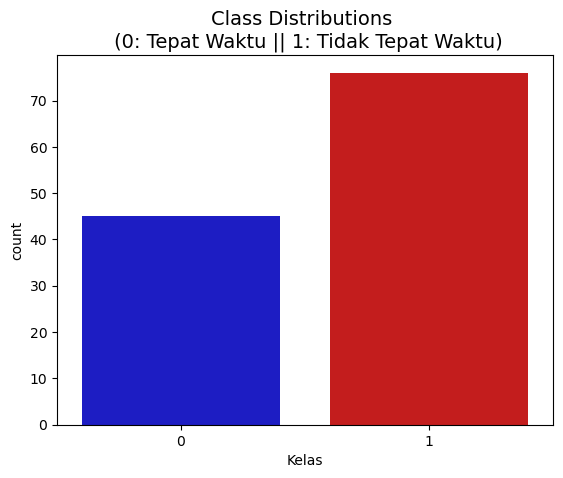

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Kelas', data=df, palette=colors)
plt.title('Class Distributions \n (0: Tepat Waktu || 1: Tidak Tepat Waktu)', fontsize=14)
plt.show()

# Dataset tidak balance, jomplang bet perbedaannya.


kita Resampling datanya. Resampling ada 2 :

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
disini kita menggunakan random over sampling

In [12]:
# Class count
count_class_0, count_class_1 = df.Kelas.value_counts()

# Divide by class
df_class_0 = df[df['Kelas'] == 0]
df_class_1 = df[df['Kelas'] == 1]

Random over-sampling:
Kelas
1    76
0    45
Name: count, dtype: int64


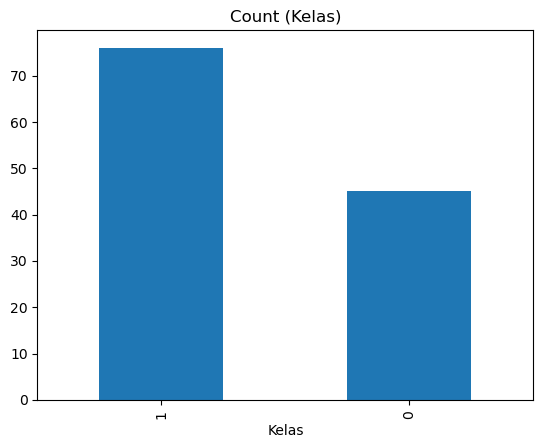

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Kelas.value_counts())

df_test_over.Kelas.value_counts().plot(kind='bar', title='Count (Kelas)');

gas kan le, kalo udah balance

In [14]:
x = df[['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
y = df['Kelas']

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

validation_size = 0.20
num_trees = 5

# Pisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, shuffle=False, random_state=None)

In [16]:
# Inisialisasi model Random Forest dengan parameter yang disetel secara manual
model = RandomForestClassifier(
    n_estimators=num_trees,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2
)

In [17]:
model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [18]:
# Prediksi pada data latih
y_train_pred = model.predict(x_train)

# Prediksi pada data uji
y_test_pred = model.predict(x_test)

In [19]:
# Hitung confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [20]:
# Hitung akurasi pada data latih
accuracy_train = accuracy_score(y_train, y_train_pred)

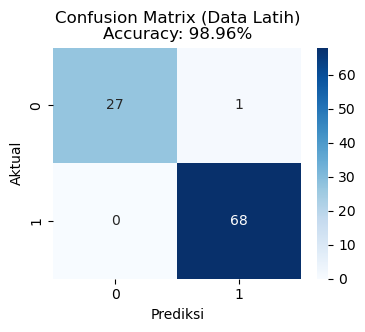

In [21]:
# Visualisasi confusion matrix pada data latih
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Latih)\nAccuracy: {accuracy_train:.2%}')
plt.show()

In [22]:
# Hitung confusion matrix pada data uji
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [23]:
# Hitung akurasi pada data uji
accuracy_test = accuracy_score(y_test, y_test_pred)

In [24]:
# Ekstraksi nilai dari confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
tn, fp, fn, tp = conf_matrix_test.ravel()

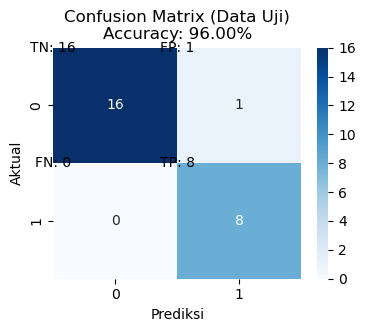

In [25]:
# Visualisasi confusion matrix pada data uji dengan penekanan pada True Positive dan False Negative
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Menambahkan label untuk True Positive dan False Negative
plt.text(0, 0, f'TN: {tn}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN: {fn}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP: {fp}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP: {tp}', horizontalalignment='center', verticalalignment='center')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Uji)\nAccuracy: {accuracy_test:.2%}')
plt.show()

In [26]:
df_new = pd.read_excel('tekpang20.xlsx')

In [27]:
# Menghapus Index
df_new = df_new.reset_index(drop=True)
df_new.columns = ['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']
def_status = 0
df_new.fillna(def_status, inplace = True)
df_new

,nim,nama,prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,2000033028,Aura Kartika Ayudia Johan,Teknologi Pangan,7,125,3.47,469,0.0
1,2000033030,Bima Arya Putra,Teknologi Pangan,8,124,0.15,410,0.0
2,2000033032,Galang Awal Prasojo,Teknologi Pangan,8,127,3.58,420,0.0
3,2000033035,Nisrina Octavia Nur Aini,Teknologi Pangan,6,127,3.56,443,0.0
4,2000033039,Mirza Auly Yahya,Teknologi Pangan,6,127,3.97,414,0.0
...,...,...,...,...,...,...,...,...
61,2000033114,Eka Suntiawati,Teknologi Pangan,6,130,3.83,480,0.0
62,2011033044,Syahrul Osamma Affath Khan,Teknologi Pangan,7,130,3.69,400,0.0
63,2015033037,Uswatun Khasanah,Teknologi Pangan,6,130,3.78,523,0.0
64,2015033043,Alfina Rachmawati,Teknologi Pangan,6,131,3.80,480,0.0


In [28]:
# Mapping kelas menjadi 0 (Tepat Waktu) dan 1 (Tidak Tepat Waktu)
ket = {"Tepat Waktu": 0, "Tidak Tepat Waktu": 1}
df_new["Kelas"] = df_new["Kelas"].map(ket)

In [29]:
# Membuat data training
data2 = df_new.loc[:, ['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
X_new = data2

In [30]:
# Prediksi menggunakan model Random Forest yang telah dilatih
predictions_new = model.predict(X_new)

In [31]:
# Mapping hasil prediksi menjadi label yang sesuai
hasil_prediksi = pd.Series(predictions_new).map({0: "Tepat Waktu", 1: "Tidak Tepat Waktu"})

In [32]:
# Menambahkan kolom Hasil ke dataset_new
df_new['Hasil'] = hasil_prediksi

In [33]:
# Menampilkan hasil prediksi
print("Prediksi untuk dataset baru:")
print(df_new[['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Hasil']])

Prediksi untuk dataset baru:
           nim                        nama             prodi  Lama Penulisan  \
0   2000033028   Aura Kartika Ayudia Johan  Teknologi Pangan               7   
1   2000033030             Bima Arya Putra  Teknologi Pangan               8   
2   2000033032         Galang Awal Prasojo  Teknologi Pangan               8   
3   2000033035    Nisrina Octavia Nur Aini  Teknologi Pangan               6   
4   2000033039            Mirza Auly Yahya  Teknologi Pangan               6   
..         ...                         ...               ...             ...   
61  2000033114              Eka Suntiawati  Teknologi Pangan               6   
62  2011033044  Syahrul Osamma Affath Khan  Teknologi Pangan               7   
63  2015033037            Uswatun Khasanah  Teknologi Pangan               6   
64  2015033043           Alfina Rachmawati  Teknologi Pangan               6   
65  2015033063               Lis Setyowati  Teknologi Pangan               6   

    SKS   

In [34]:
# Hitung nilai kelas
class_counts = df_new.Hasil.value_counts()

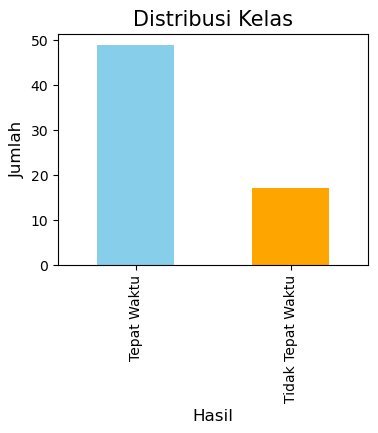

In [35]:
# Buat plot bar
plt.figure(figsize=(4,3))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
# Beri judul dan label sumbu
plt.title('Distribusi Kelas', fontsize=15)
plt.xlabel('Hasil', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan plot
plt.show()

In [36]:
# Simpan model ke dalam file menggunakan pickle
import pickle
with open('tekpang.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)